In [2]:
#Import External Libraries
import numpy as np
import matplotlib.pyplot as plt
import os 
import cv2 
from PIL import Image 

#Import My Library
My_Module_PATH = "C:\\Users\\boris\\OneDrive - Queen's University\\Documents\\JOB_Files\\McDonald Institute Fellowship\\Research\\Coding\\1D codes"
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, My_Module_PATH)
from OneD_module import *

#Set up Directory for saving files/images/videos
# Will not rename this again
Directory = "C:\\Users\\boris\\OneDrive - Queen's University\\Documents\\JOB_Files\\McDonald Institute Fellowship\\Research\\Coding\\1D codes\\Self - Gravitating Systems"

## Checking for 1 Time-Step

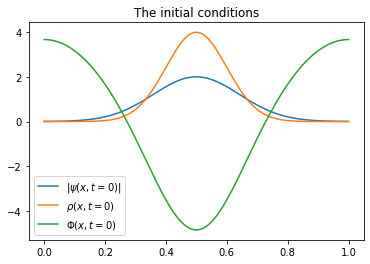

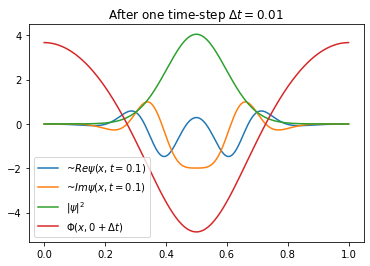

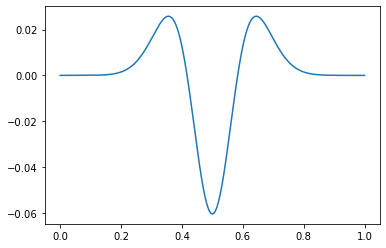

In [3]:
#Build the Initial Condition
N = 1000 #set size
L = 1 #length of periodic box
x = np.linspace(0,L,N) #make x data / grid
dx = L/(N-1)
m = 100
hbar = 1

b=L/2
std=0.1
rho_init = np.array([gauss(xx,b,std) for xx in x])
psi = np.sqrt(rho_init) #assuming psi_init to be real valued and non-negative

phi_init = real_fourier_potential(psi,m,L)

#Plot initial conditions
plt.plot(x,psi, label = '$|\\psi(x,t=0)|$')
plt.plot(x,rho_init, label = '$\\rho(x,t=0)$')
plt.plot(x,phi_init, label = '$\\Phi(x,t=0)$')
plt.title("The initial conditions")
plt.legend()
plt.show()

#Evolve the system by one time-step
#H_psi = H(psi,phi_init,dx,hbar,m)
#print(H_psi)
#Delta_t = 0.01
#psi = psi-1j*Delta_t*H_psi #np.dot(H_psi,psi_init) #recalculate psi after the time step

dt = 0.01
psi,phi,P = time_evolve(psi,phi_init,dx,dt,hbar,m,L)

#plt.plot(x,np.dot(H,psi_init), label = '') 
plt.plot(x,np.real(psi),label = '~$Re\\psi(x,t=0.1)$')
plt.plot(x,np.imag(psi),label = '~$Im\\psi(x,t=0.1)$')
plt.plot(x,np.absolute(psi)**2,label = '$|\psi|^2$')
plt.plot(x,real_fourier_potential(psi,m,L), label = '$\\Phi(x,0+\\Delta t)$')
plt.title(f"After one time-step $\\Delta t = ${dt}")
plt.legend()
plt.show()

plt.plot(x,rho_init-np.absolute(psi)**2)
plt.show()

## 1. $\psi(t=0,x) = \sin^2(\frac{\pi x}{L})$

In [4]:
#CALCULATION
#Build the Initial Condition
N = 500 #set size
L = 1 #length of periodic box
x = np.linspace(0,L,N) #make x data / grid
dx = L/(N-1)
m = 10
hbar = 1

#Let's try this particular psi. 
psi = np.sin(0.5*2*np.pi*x/L)**2

#Calculate initial Potential [perturbation]
phi = real_fourier_potential(psi,m,L)

#Calculate initial Density perturbation
rho = m*np.absolute(psi)**2
rho_avg = np.mean(rho)
P = rho-rho_avg

#storage space, with initial functions
P_s = np.array([P]) #initial density perturbation
psi_s = np.array([psi]) #initial wavefunction
phi_s = np.array([phi]) #initial potential [perturbation]

#P_diffs = np.array([])

dt = 0.01
t_stop = 20
time = 0
for i in range(int(t_stop//dt)):
    
    #Evolve system forward by one time-step
    psi,phi,P = time_evolve(psi,phi,dx,dt,hbar,m,L)
    
    #Append/store new arrays
    psi_s = np.append(psi_s,[psi], axis = 0)
    P_s = np.append(P_s, [P], axis = 0)
    phi_s = np.append(phi_s,[phi], axis = 0)

    #P_diffs = np.append(P_diffs,[P - P_s[i]],axis = 0)
    #plt.plot(x,P-P_s[i])
    #plt.show()
    #time += dt #forward on the clock

    #if math.isnan(H(psi,phi,dx,hbar,m)[0]) == True:
     #   break


In [ ]:
folder_name = "ToyModel_UnitaryTime_Images"
plot_save_waves(x,psi_s,phi_s,P_s,dt,Directory,folder_name)

In [ ]:
video_name  = "ToyModel_UnitaryTime_Images_NEW.mp4"
generate_video(Directory,folder_name,video_name,dt)

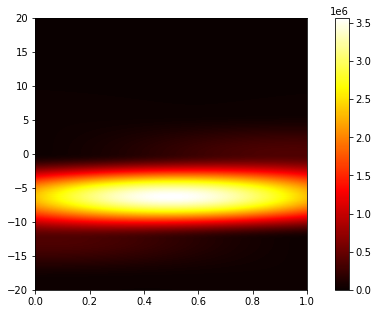

In [4]:
F = Husimi_phase(psi_s[1500],x,dx,hbar)

k = 2*np.pi*np.fft.fftfreq(len(x),dx)
x_min, x_max = np.min(x), np.max(x)
k_min, k_max = np.min(k), np.max(k)

y_max = 20
plt.figure(figsize = (10,5))
plt.imshow(F,extent = (x_min,x_max,k_min,k_max),cmap = cm.hot, aspect = x_max/(2*y_max) ) #norm = Normalize(0,max_F),
plt.xlim([x_min,x_max])
plt.ylim([-y_max,y_max])
plt.colorbar()
plt.show()

In [5]:
max_F = 4*10**6
frame_spacing = 1
folder_name = "UT_Phase_Images"
y_max = 20
generate_phase_plots(psi_s,x,dx,hbar,y_max,max_F,frame_spacing,Directory,folder_name)

0  Done
1  Done
2  Done
3  Done
4  Done
5  Done
6  Done
7  Done
8  Done
9  Done
10  Done
11  Done
12  Done
13  Done
14  Done
15  Done
16  Done
17  Done
18  Done
19  Done
20  Done
21  Done
22  Done
23  Done
24  Done
25  Done
26  Done
27  Done
28  Done
29  Done
30  Done
31  Done
32  Done
33  Done
34  Done
35  Done
36  Done
37  Done
38  Done
39  Done
40  Done
41  Done
42  Done
43  Done
44  Done
45  Done
46  Done
47  Done
48  Done
49  Done
50  Done
51  Done
52  Done
53  Done
54  Done
55  Done
56  Done
57  Done
58  Done
59  Done
60  Done
61  Done
62  Done
63  Done
64  Done
65  Done
66  Done
67  Done
68  Done
69  Done
70  Done
71  Done
72  Done
73  Done
74  Done
75  Done
76  Done
77  Done
78  Done
79  Done
80  Done
81  Done
82  Done
83  Done
84  Done
85  Done
86  Done
87  Done
88  Done
89  Done
90  Done
91  Done
92  Done
93  Done
94  Done
95  Done
96  Done
97  Done
98  Done
99  Done
100  Done
101  Done
102  Done
103  Done
104  Done
105  Done
106  Done
107  Done
108  Done
109  Done
110  Done


In [6]:
video_name = "UT_Phase_video.mp4"
generate_phase_video(Directory,folder_name,video_name,dt,frame_spacing)

['ToyModelPlot0001.jpg', 'ToyModelPlot0002.jpg', 'ToyModelPlot0003.jpg', 'ToyModelPlot0004.jpg', 'ToyModelPlot0005.jpg', 'ToyModelPlot0006.jpg', 'ToyModelPlot0007.jpg', 'ToyModelPlot0008.jpg', 'ToyModelPlot0009.jpg', 'ToyModelPlot0010.jpg', 'ToyModelPlot0011.jpg', 'ToyModelPlot0012.jpg', 'ToyModelPlot0013.jpg', 'ToyModelPlot0014.jpg', 'ToyModelPlot0015.jpg', 'ToyModelPlot0016.jpg', 'ToyModelPlot0017.jpg', 'ToyModelPlot0018.jpg', 'ToyModelPlot0019.jpg', 'ToyModelPlot0020.jpg', 'ToyModelPlot0021.jpg', 'ToyModelPlot0022.jpg', 'ToyModelPlot0023.jpg', 'ToyModelPlot0024.jpg', 'ToyModelPlot0025.jpg', 'ToyModelPlot0026.jpg', 'ToyModelPlot0027.jpg', 'ToyModelPlot0028.jpg', 'ToyModelPlot0029.jpg', 'ToyModelPlot0030.jpg', 'ToyModelPlot0031.jpg', 'ToyModelPlot0032.jpg', 'ToyModelPlot0033.jpg', 'ToyModelPlot0034.jpg', 'ToyModelPlot0035.jpg', 'ToyModelPlot0036.jpg', 'ToyModelPlot0037.jpg', 'ToyModelPlot0038.jpg', 'ToyModelPlot0039.jpg', 'ToyModelPlot0040.jpg', 'ToyModelPlot0041.jpg', 'ToyModelPlot00

## 2. Gaussian Initial

In [ ]:
#CALCULATION
#Build the Initial Condition
N = 1000#set size
L = 10 #length of periodic box
x = np.linspace(0,L,N) #make x data / grid
dx = L/(N-1)
m = 5
#print(len(x),x[0],x[1],x[-1])

#Let's try this particular psi. 
b=L/2
std=0.1
rho_init = gauss(x,b,std)/m
psi = np.sqrt(rho_init) #assuming psi_init to be real valued and non-negative
#plt.show()


phi = real_fourier_potential(psi,m)

#Calculate initial Density perturbation
rho = m*np.absolute(psi)**2
rho_avg = np.mean(rho)
P = rho-rho_avg

#storage space, with initial functions
P_s = np.array([P]) #initial density perturbation
psi_s = np.array([psi]) #initial wavefunction
phi_s = np.array([phi]) #initial potential [perturbation]


dt = 0.1
t_stop = 20
time = 0
while time <= t_stop:
    
    #Evolve system forward by one time-step
    psi,phi,P = time_evolve(psi,phi,dx,dt,hbar,m)
    
    #Append/store new arrays
    psi_s = np.append(psi_s,[psi], axis = 0)
    P_s = np.append(P_s, [P], axis = 0)
    phi_s = np.append(phi_s,[phi], axis = 0)

    time += dt #forward on the clock

    #if math.isnan(H(psi,phi,dx,hbar,m)[0]) == True:
     #   break


In [ ]:
#plt.figure()
for i in range(len(P_s)):
    fig,ax = plt.subplots(1,2)
    plt.suptitle(f"Time {round(dt*i,1)}")
    
    ax[0].plot(x,psi_s[i].real, label = "$\\psi$ Re")
    ax[0].plot(x,psi_s[i].imag, label = "$\\psi$ Im")
    ax[0].plot(x,phi_s[i],label = "Potential [Fourier perturbation]")
    ax[0].plot(x,np.absolute(psi_s[i])**2,label = "$|\\psi|^2$")
    ax[0].set_ylim([-1.1,1.1])
    ax[0].legend()

    ax[1].plot(x,P_s[i],label = "Perturbation on $\\rho$")
    ax[1].set_ylim([-1,m])
    ax[1].legend()
    
    #now save it as a .jpg file:
    filename = 'ToyModelPlot' + str(i+1).zfill(4) + '.jpg';
    folder = "C:\\Users\\boris\\OneDrive - Queen's University\\Documents\\JOB_Files\\McDonald Institute Fellowship\\Research\\Coding\\ToyModel_UT_GaussInit_Images"
    plt.savefig(folder + "/" + filename)  #save this figure (includes both subplots)
    
    plt.close() #close plot so it doesn't overlap with the next one


In [ ]:
# importing libraries
import os
import cv2 
from PIL import Image 
  
# Checking the current directory path
print(os.getcwd()) 
  
# Folder which contains all the images
# from which video is to be generated
os.chdir("C:\\Users\\boris\\OneDrive - Queen's University\\Documents\\JOB_Files\\McDonald Institute Fellowship\\Research\\Coding\\ToyModel_UT_GaussInit_Images")  
path = "C:\\Users\\boris\\OneDrive - Queen's University\\Documents\\JOB_Files\\McDonald Institute Fellowship\\Research\\Coding\\ToyModel_UT_GaussInit_Images"
  
mean_height = 0
mean_width = 0
  
num_of_images = len(os.listdir('.'))
print(num_of_images)
  
for file in os.listdir('.'):
    im = Image.open(os.path.join(path, file))
    width, height = im.size
    mean_width += width
    mean_height += height
    # im.show()   # uncomment this for displaying the image
  
# Finding the mean height and width of all images.
# This is required because the video frame needs
# to be set with same width and height. Otherwise
# images not equal to that width height will not get 
# embedded into the video
mean_width = int(mean_width / num_of_images)
mean_height = int(mean_height / num_of_images)
  
# print(mean_height)
# print(mean_width)
  
# Resizing of the images to give
# them same width and height 
for file in os.listdir('.'):
    if file.endswith(".jpg") or file.endswith(".jpeg") or file.endswith("png"):
        # opening image using PIL Image
        im = Image.open(os.path.join(path, file)) 
   
        # im.size includes the height and width of image
        width, height = im.size   
        print(width, height)
  
        # resizing 
        imResize = im.resize((mean_width, mean_height), Image.ANTIALIAS) 
        imResize.save( file, 'JPEG', quality = 1080) # setting quality
        # printing each resized image name
        print(im.filename.split('\\')[-1], " is resized") 
  
  
# Video Generating function
def generate_video():
    image_folder = "C:\\Users\\boris\\OneDrive - Queen's University\\Documents\\JOB_Files\\McDonald Institute Fellowship\\Research\\Coding\\ToyModel_UT_GaussInit_Images" # make sure to use your folder
    video_name = 'ToyModel_UnitaryTime_GaussInit_video.mp4'
    os.chdir("C:\\Users\\boris\\OneDrive - Queen's University\\Documents\\JOB_Files\\McDonald Institute Fellowship\\Research\\Coding")
      
    images = [img for img in os.listdir(image_folder)
              if img.endswith(".jpg") or
                 img.endswith(".jpeg") or
                 img.endswith("png")]
     
    # Array images should only consider
    # the image files ignoring others if any
    print(images) 
  
    frame = cv2.imread(os.path.join(image_folder, images[0]))
  
    # setting the frame width, height width
    # the width, height of first image
    height, width, layers = frame.shape  
  
    fps = int(1/dt)
    video = cv2.VideoWriter(video_name, 0, fps, (width, height)) 
  
    # Appending the images to the video one by one
    for image in images: 
        video.write(cv2.imread(os.path.join(image_folder, image))) 
      
    # Deallocating memories taken for window creation
    cv2.destroyAllWindows() 
    video.release()  # releasing the video generated
  
  
# Calling the generate_video function
generate_video()